In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("US_honey_dataset.csv")

In [3]:
df

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...,...
1110,1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1115 non-null   int64  
 1   state                1115 non-null   object 
 2   colonies_number      1115 non-null   int64  
 3   yield_per_colony     1115 non-null   int64  
 4   production           1115 non-null   int64  
 5   stocks               1115 non-null   int64  
 6   average_price        1115 non-null   float64
 7   value_of_production  1115 non-null   int64  
 8   year                 1115 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 78.5+ KB


In [5]:
# Removing the "Unnamed: 0" column from the dataset as it does not hold any significance


df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
# EDA-Exploratory Data Analysis


"""# data Cleansing
null values
duplicate values
outliers"""

In [6]:
df.isnull().sum()

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [ ]:
"""if null values are there:
    if few null values are there, then drop it,otherwise : #df.dropna(inplace=True)
        Replace:
            if the columns is having integer value, replace with mean/median #df.fillna(df[column].mean())
            if the columns is having object value, replace with mode"""

In [7]:
# dealing with duplicate values

df.duplicated().sum()

0

In [8]:
#if duplicates are there
# df.drop_duplicates(inplace =True)

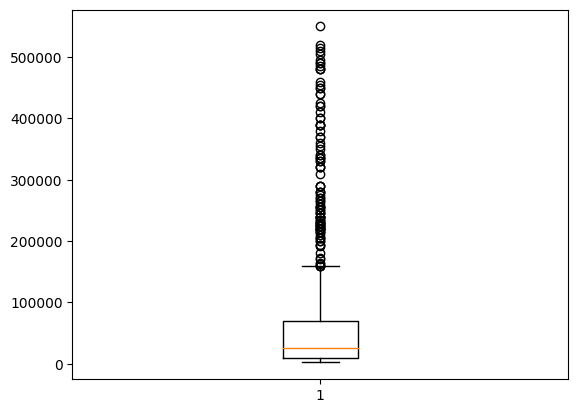

In [9]:
# checking for outliers


plt.boxplot(df["colonies_number"])
plt.show()

In [10]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

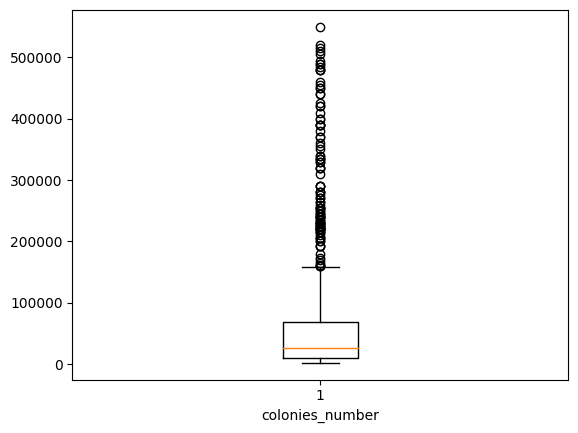

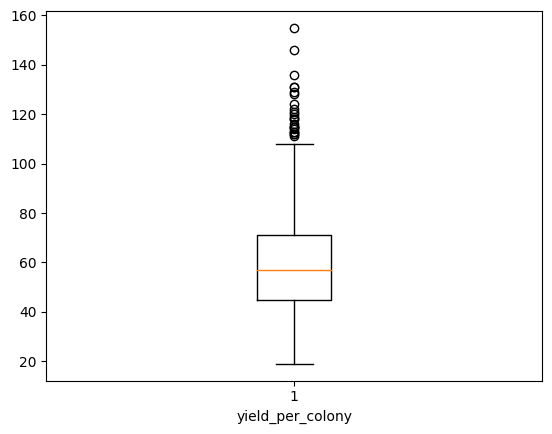

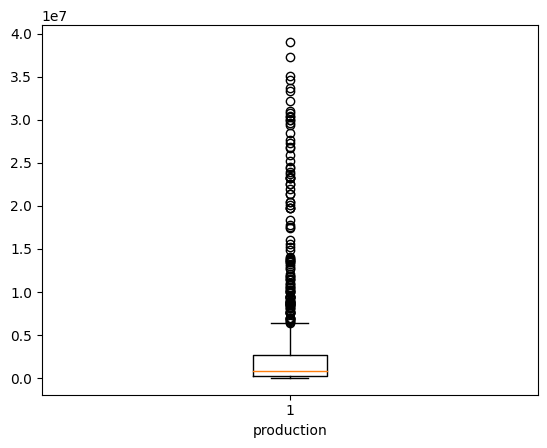

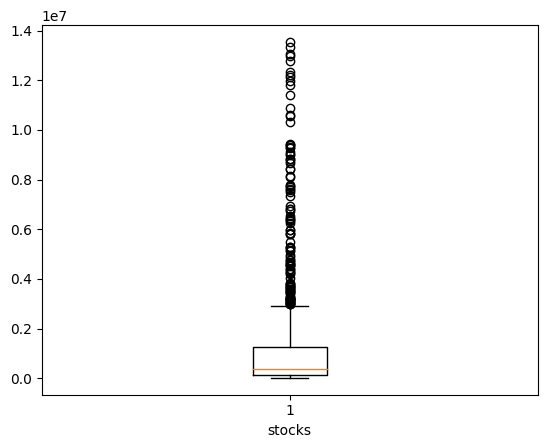

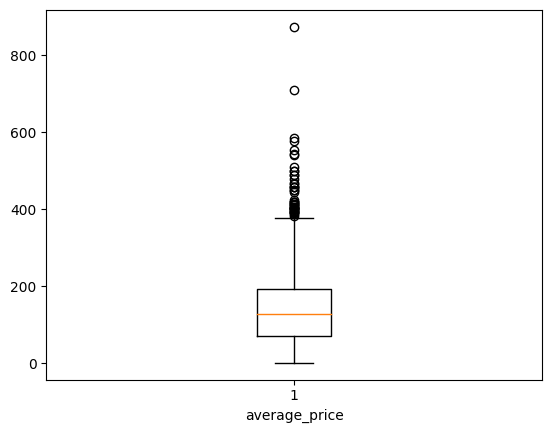

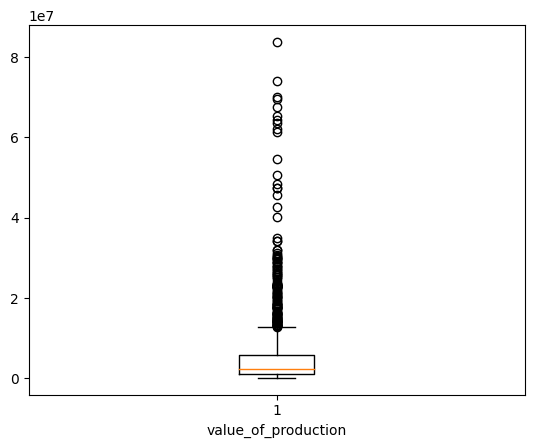

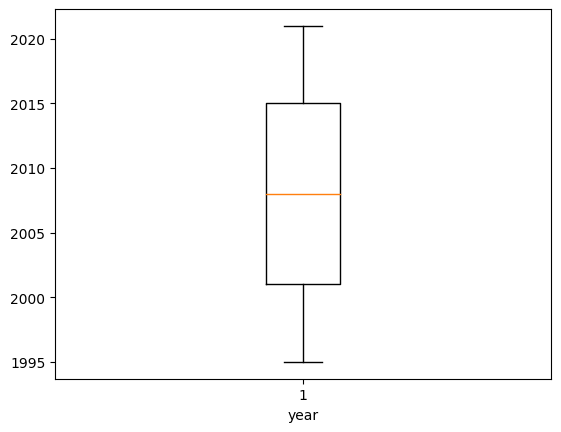

In [12]:
for col in df.columns:
    if df[col].dtype!="object":
      plt.boxplot(df[col])
      plt.xlabel(col)
      plt.show()

In [ ]:
# as due to large number of outliers we are ignoring  because we are not implementing  any advance ML algorithm
# them  as removing them will cause data loss

In [ ]:
# Let's Draw the Inferences from the data using Visualization


# Q1. which states are rarely contributing for honey production since last 27 years?

In [18]:
df["state"].value_counts()

Alabama          27
Missouri         27
Arizona          27
NewJersey        27
NewYork          27
NorthCarolina    27
NorthDakota      27
Ohio             27
Oregon           27
Pennsylvania     27
SouthDakota      27
Tennessee        27
Texas            27
Utah             27
Vermont          27
Virginia         27
Washington       27
WestVirginia     27
Wisconsin        27
Montana          27
Nebraska         27
Mississippi      27
Minnesota        27
Arkansas         27
California       27
Colorado         27
Florida          27
Georgia          27
Hawaii           27
Idaho            27
Illinois         27
Indiana          27
Iowa             27
Kansas           27
Louisiana        27
Maine            27
Michigan         27
Wyoming          27
Kentucky         26
NewMexico        18
Nevada           15
SouthCarolina    12
Oklahoma          9
Maryland          9
Name: state, dtype: int64

<Axes: >

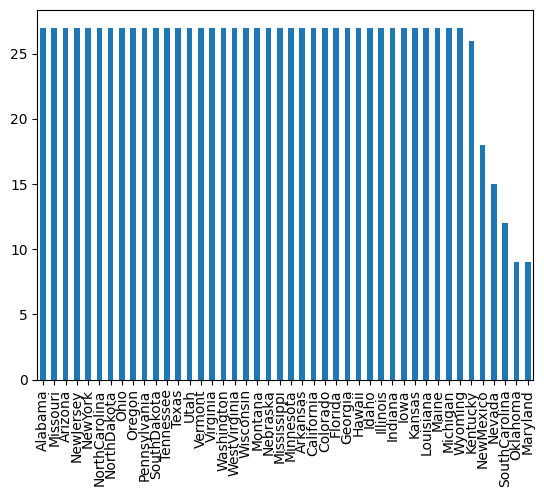

In [21]:
df["state"].value_counts().plot.bar()

In [ ]:
# conclusion:
#     oklahama and maryland

========================================================================================================================================================================================

In [ ]:

# Q2. Which are the top 5 Honey producing state?(total production since 1995)

In [27]:
new_df=df.groupby("state").sum()["production"].reset_index()
new_df

,state,production
0,Alabama,14467000
1,Arizona,38844000
2,Arkansas,51846000
3,California,423876000
4,Colorado,32660000
5,Florida,280934000
6,Georgia,57426000
7,Hawaii,15420000
8,Idaho,87188000
9,Illinois,9864000


In [29]:
new_df=new_df.sort_values(by="production")

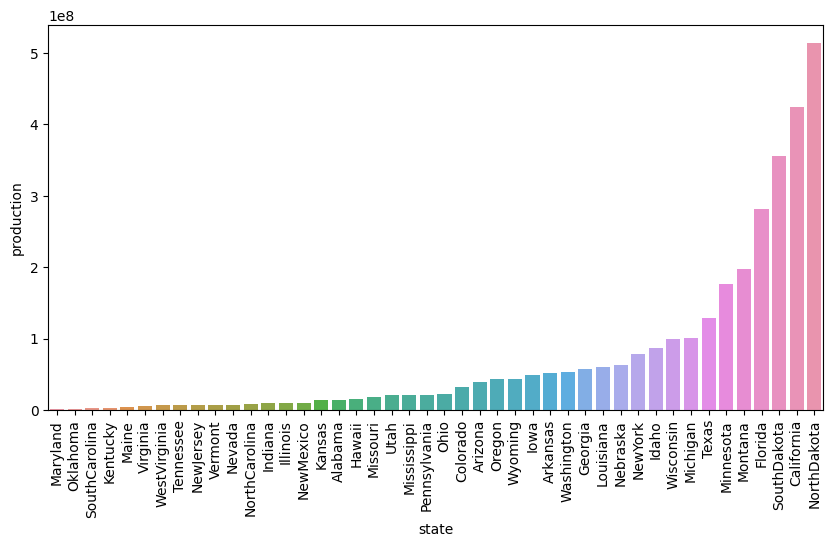

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(data=new_df,x="state",y="production")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# conclusion :
#     top 5 states with highest honey production:
#         North Dakota
#         California
#         South Dakota
#         Florida
#         Montana



------------------------------------------------------------------------------------------------------------------------------------------

In [37]:
# 3.What is the Change in mean Average price of Honey from 1995 to 2021

NEW_DF=df.groupby("year").mean()["average_price"].reset_index()
NEW_DF

<ipython-input-37-65c2c1b9f107>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NEW_DF=df.groupby("year").mean()["average_price"].reset_index()


,year,average_price
0,1995,74.840909
1,1996,99.568182
2,1997,91.325581
3,1998,83.720930
4,1999,80.325581
5,2000,79.023256
6,2001,88.465116
7,2002,133.204545
8,2003,151.068182
9,2004,132.350000


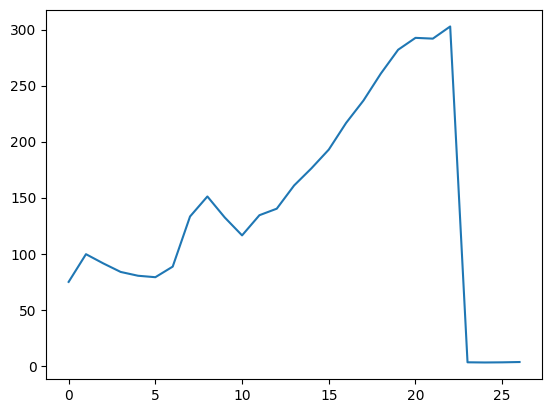

In [38]:
plt.plot(NEW_DF["average_price"])

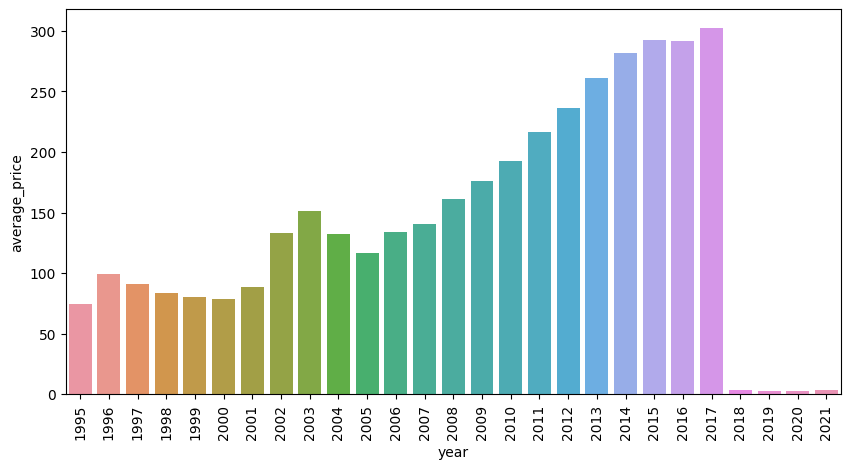

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(data=NEW_DF,x="year",y="average_price")
plt.xticks(rotation=90)
plt.show()


In [ ]:
#conclusion:
# from 1995 to 2017 the avg price of honey was increasing drastically but in 2018 the price suddendly dropped


-----------------------------------------------------------------------------------------------------------------------------------------

In [44]:
#  Q4. Which was the year when production of Honey in entire US was the highest?


new_DF=df.groupby("year").sum()["production"].reset_index()
new_DF


new_DF.sort_values(by="production")

<ipython-input-44-be1bfdfdccbe>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_DF=df.groupby("year").sum()["production"].reset_index()


,year,production
26,2021,23187000
23,2018,28989000
22,2017,30478000
17,2012,31662000
16,2011,36550000
18,2013,37974000
25,2020,39412000
24,2019,40510000
21,2016,40837000
19,2014,40990000


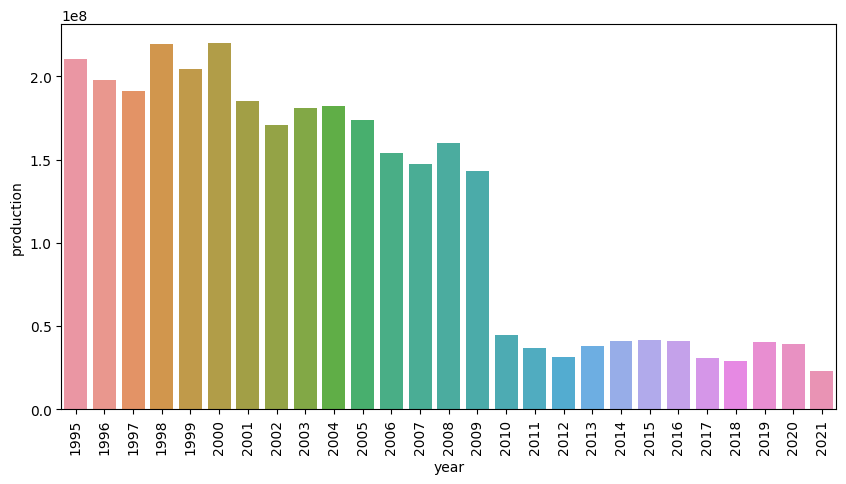

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(data=new_DF,x="year",y="production")
plt.xticks(rotation=90)
plt.show()

In [56]:
# Q5.from the above inference we get the production was highest in the year 2000,
#     now lets infer which state was having highest contribution in that year?



new_df=df[df["year"]==2000][["state","production"]]


In [57]:
new_df=new_df.sort_values(by="production",ascending=False)

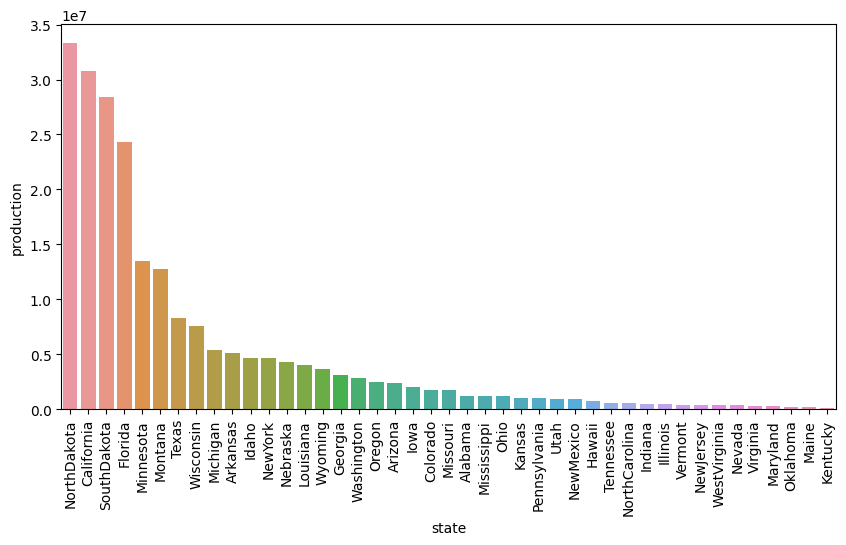

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(data=new_df,x="state",y="production")
plt.xticks(rotation=90)
plt.show()

In [59]:
## Q6.Which states are having the highest no. of colonies in year 2010


new_df=df[df["year"]==2000][["state","colonies_number"]]


In [60]:
new_df=new_df.sort_values(by="colonies_number",ascending=False)

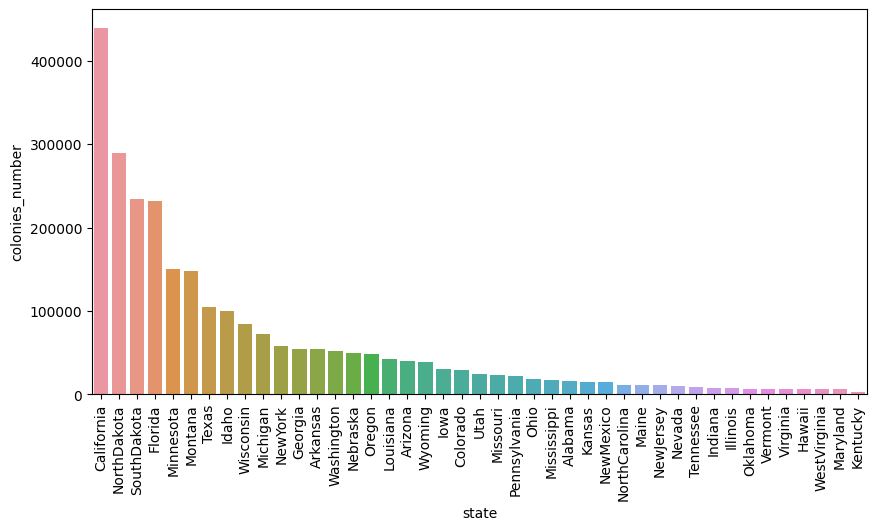

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(data=new_df,x="state",y="colonies_number")
plt.xticks(rotation=90)
plt.show()

In [8]:
# Which states produces highest number of honey production from 2000 to 2021.



new_df=df[df["year"]>=2000][["state","production"]]

new_df=new_df.sort_values(by="production",ascending=False)
new_df

,state,production
581,NorthDakota,35100000
622,NorthDakota,34650000
458,NorthDakota,33670000
245,NorthDakota,33350000
350,California,32160000
...,...,...
769,Kentucky,17000
984,SouthCarolina,15000
955,Alabama,14000
835,Alabama,13000


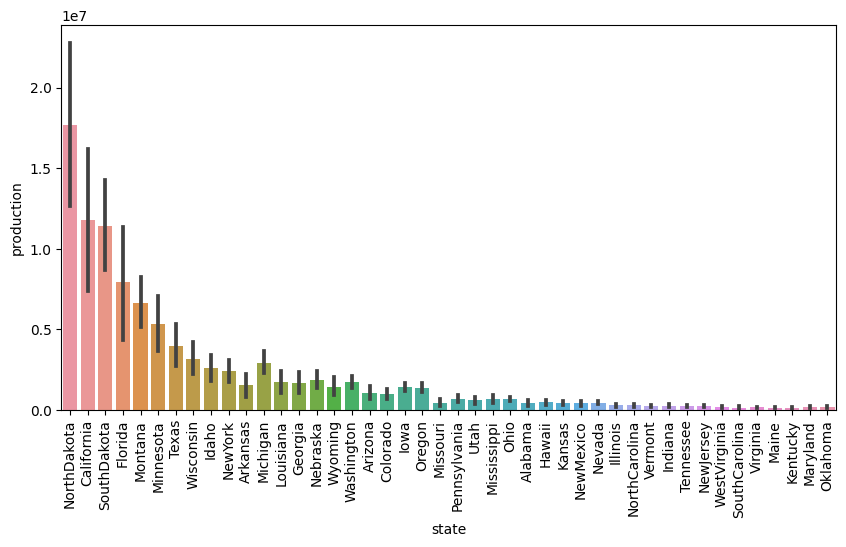

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(data=new_df,x="state",y="production")
plt.xticks(rotation=90)
plt.show()